In [80]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("hotel_bookings.csv")

In [3]:
df.shape

(119390, 32)

In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
df["demand"] = df["adults"] + df["children"] + df["babies"]

In [30]:
df['arrival_date'] = df['arrival_date_month'] + " " + df['arrival_date_day_of_month'].astype(str) + " " + df['arrival_date_year'].astype(str)
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

In [31]:
print(df.shape)
print(df.columns)

(119390, 34)
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'demand',
       'arrival_date'],
      dtype='object')


In [32]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,demand,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0,2017-08-30
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0,2017-08-31
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0,2017-08-31
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0,2017-08-31


In [56]:
dm = pd.DataFrame(df.groupby(['hotel','arrival_date_month'])['demand'].count())
dm = dm.reset_index()
dm

,hotel,arrival_date_month,demand
0,City Hotel,April,7480
1,City Hotel,August,8979
2,City Hotel,December,4132
3,City Hotel,February,4965
4,City Hotel,January,3736
5,City Hotel,July,8088
6,City Hotel,June,7894
7,City Hotel,March,6458
8,City Hotel,May,8232
9,City Hotel,November,4357


Text(0, 0.5, 'Demand (Total guests)')

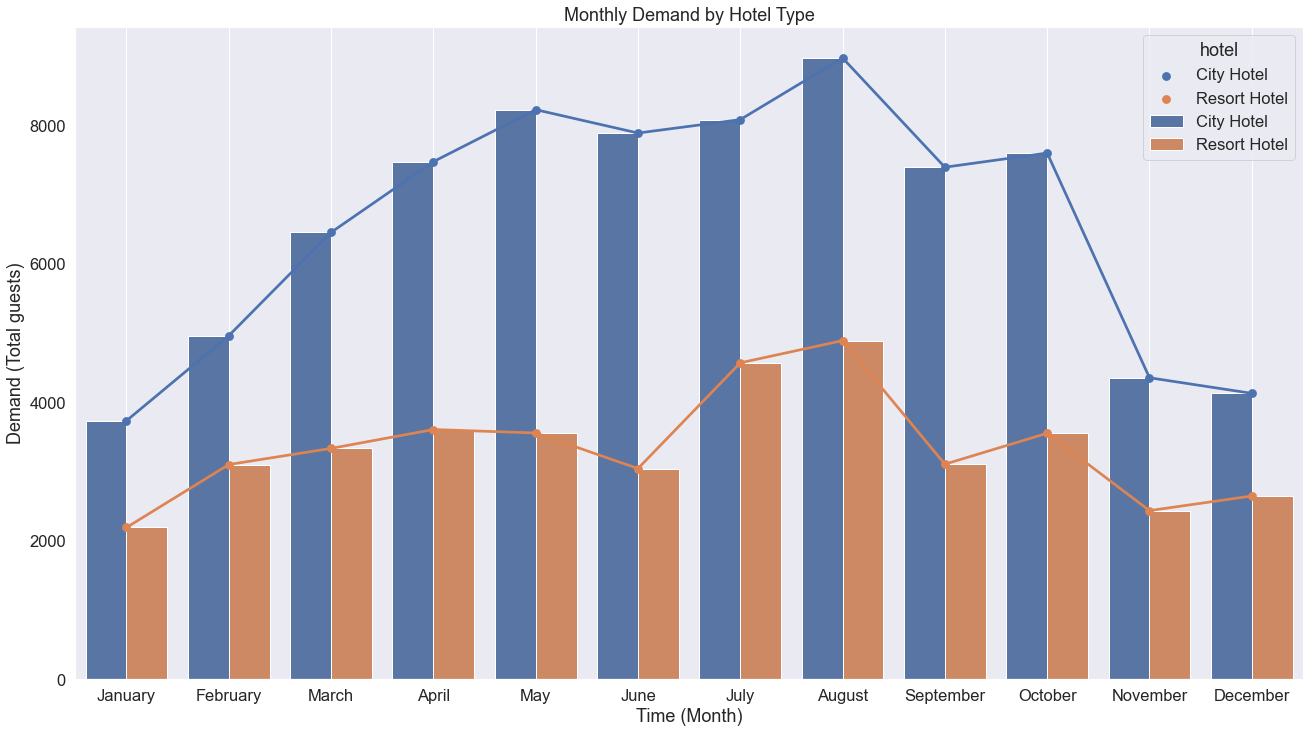

In [144]:
sns.set(font_scale=1.5,rc={'figure.figsize':(22,12)})
fig, ax = plt.subplots()
g = sns.barplot(
    data=dm, 
    x="arrival_date_month", 
    y="demand",
    hue="hotel",
    order=["January","February","March","April","May","June","July","August","September","October","November","December"],
    ax=ax
)
sns.pointplot(
    data=dm, 
    x="arrival_date_month", 
    y="demand",
    hue="hotel",
    order=["January","February","March","April","May","June","July","August","September","October","November","December"],
    ax=ax
)
ax.grid(None)
g.set(title="Monthly Demand by Hotel Type")
g.set_xlabel("Time (Month)", fontsize = 18)
g.set_ylabel("Demand (Total guests)", fontsize = 18)

Text(0, 0.5, 'Demand (Total guests)')

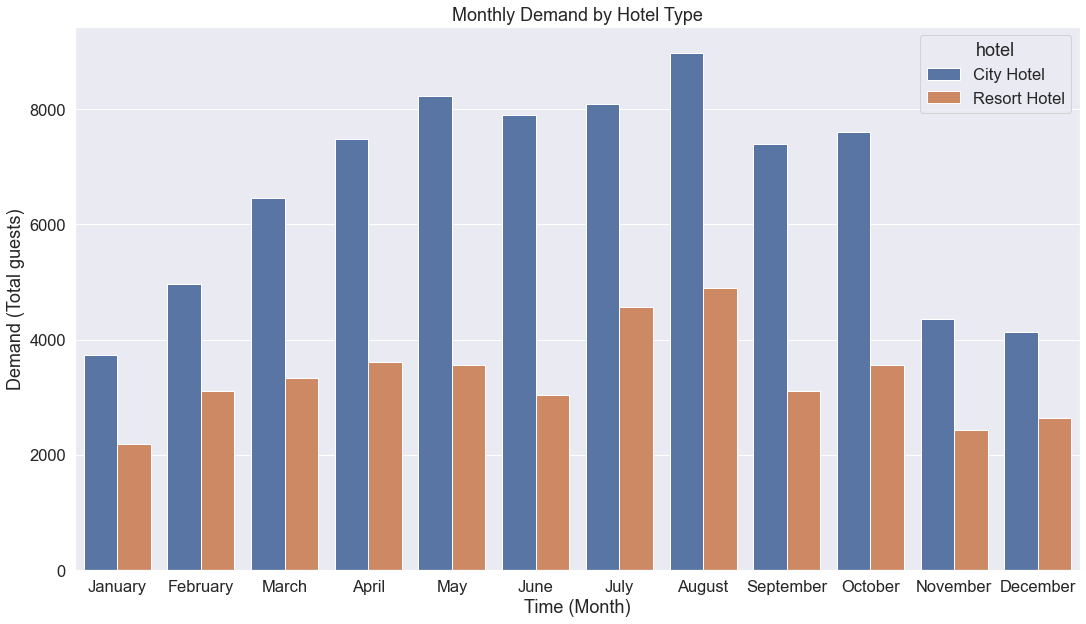

In [57]:
sns.set(font_scale=1.5,rc={'figure.figsize':(18,10)})
g = sns.barplot(
    data=dm, 
    x="arrival_date_month", 
    y="demand",
    hue="hotel",
    order=["January","February","March","April","May","June","July","August","September","October","November","December"],
)
g.set(title="Monthly Demand by Hotel Type")
g.set_xlabel("Time (Month)", fontsize = 18)
g.set_ylabel("Demand (Total guests)", fontsize = 18)

In [58]:
dy = pd.DataFrame(df.groupby(['hotel','arrival_date_year'])['demand'].count())
dy = dy.reset_index()
dy

,hotel,arrival_date_year,demand
0,City Hotel,2015,13678
1,City Hotel,2016,38140
2,City Hotel,2017,27508
3,Resort Hotel,2015,8314
4,Resort Hotel,2016,18567
5,Resort Hotel,2017,13179


Text(0, 0.5, 'Demand (Total guests)')

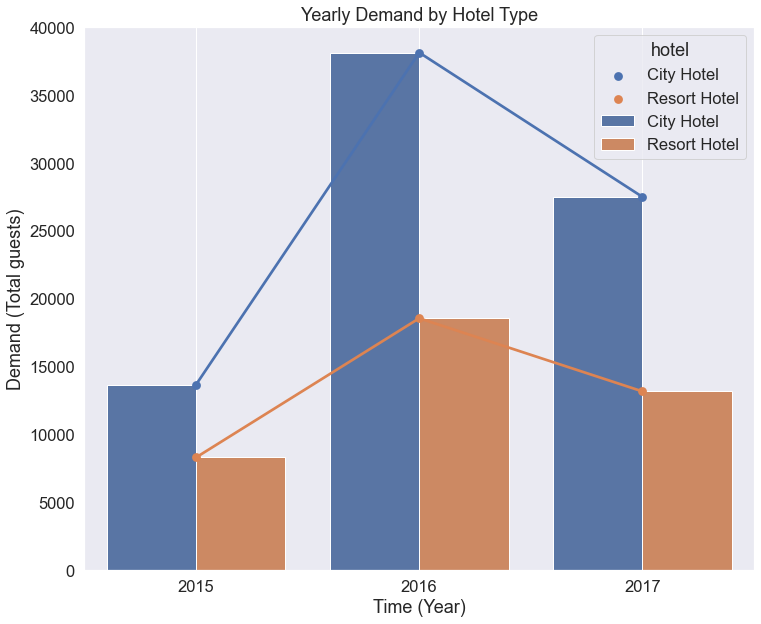

In [109]:
sns.set(font_scale=1.5,rc={'figure.figsize':(12,10)})
fig, ax = plt.subplots()
g = sns.barplot(
    data=dy, 
    x="arrival_date_year", 
    y="demand",
    hue="hotel",
    ax=ax
)
sns.pointplot(
    data=dy, 
    x="arrival_date_year", 
    y="demand",
    hue="hotel",
    ax=ax
)
ax.grid(None)
g.set(title="Yearly Demand by Hotel Type")
g.set_xlabel("Time (Year)", fontsize = 18)
g.set_ylabel("Demand (Total guests)", fontsize = 18)

Text(0, 0.5, 'Demand (Total guests)')

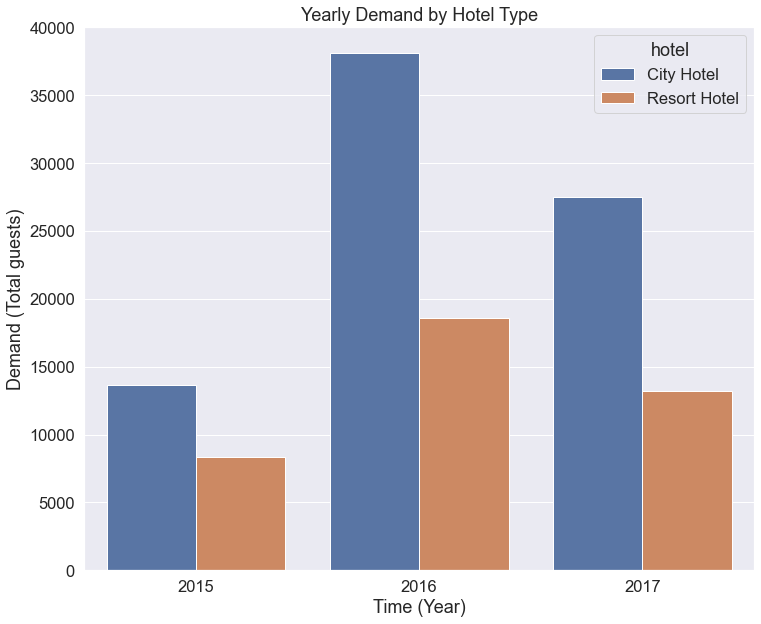

In [97]:
sns.set(font_scale=1.5,rc={'figure.figsize':(12,10)})
g = sns.barplot(
    data=dy, 
    x="arrival_date_year", 
    y="demand",
    hue="hotel",
)
g.set(title="Yearly Demand by Hotel Type")
g.set_xlabel("Time (Year)", fontsize = 18)
g.set_ylabel("Demand (Total guests)", fontsize = 18)

In [63]:
dw = pd.DataFrame(df.groupby(['hotel','arrival_date_week_number'])['demand'].count())
dw = dw.reset_index()
dw

,hotel,arrival_date_week_number,demand
0,City Hotel,1,704
1,City Hotel,2,761
2,City Hotel,3,766
3,City Hotel,4,968
4,City Hotel,5,886
...,...,...,...
101,Resort Hotel,49,716
102,Resort Hotel,50,449
103,Resort Hotel,51,430
104,Resort Hotel,52,592


Text(0, 0.5, 'Demand (Total guests)')

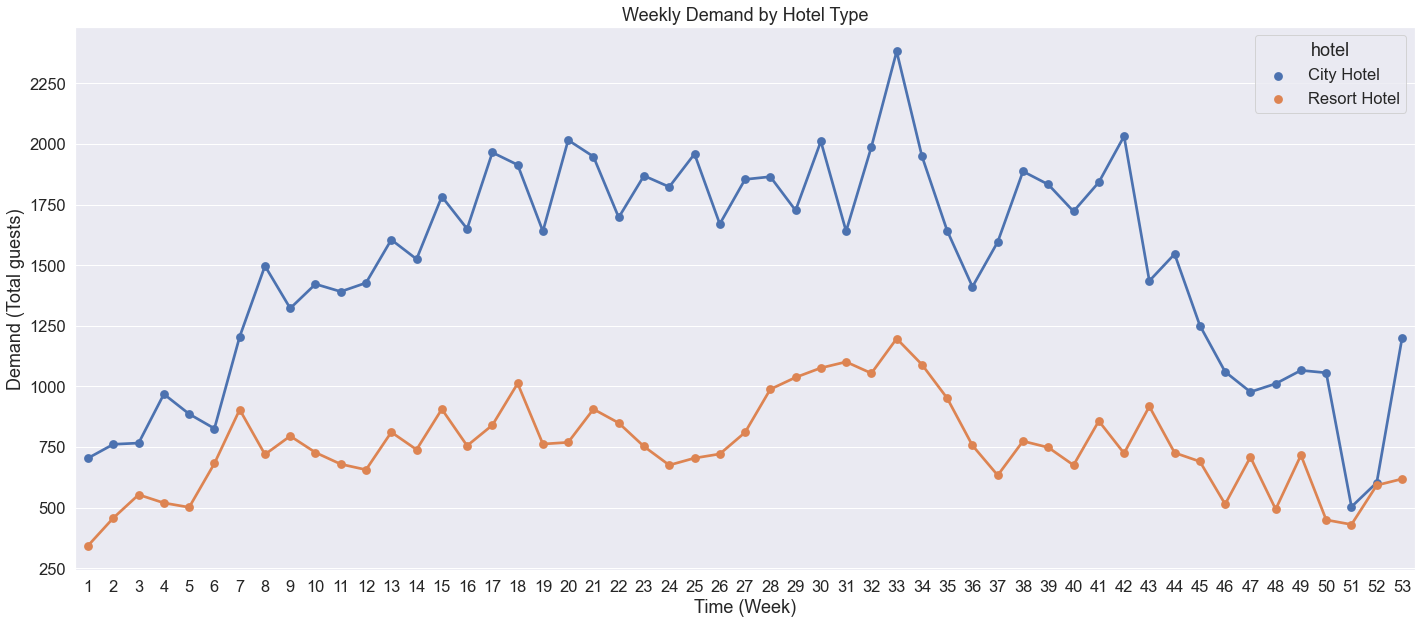

In [139]:
sns.set(font_scale=1.5,rc={'figure.figsize':(24,10)})
g = sns.pointplot(
    data=dw, 
    x="arrival_date_week_number", 
    y="demand",
    hue="hotel",
)
g.set(title="Weekly Demand by Hotel Type")
g.set_xlabel("Time (Week)", fontsize = 18)
g.set_ylabel("Demand (Total guests)", fontsize = 18)

In [68]:
dd = pd.DataFrame(df.groupby(['hotel','arrival_date_day_of_month'])['demand'].count())
dd = dd.reset_index()
dd

,hotel,arrival_date_day_of_month,demand
0,City Hotel,1,2332
1,City Hotel,2,2667
2,City Hotel,3,2529
3,City Hotel,4,2461
4,City Hotel,5,2855
...,...,...,...
57,Resort Hotel,27,1265
58,Resort Hotel,28,1276
59,Resort Hotel,29,1214
60,Resort Hotel,30,1473


Text(0, 0.5, 'Demand (Total guests)')

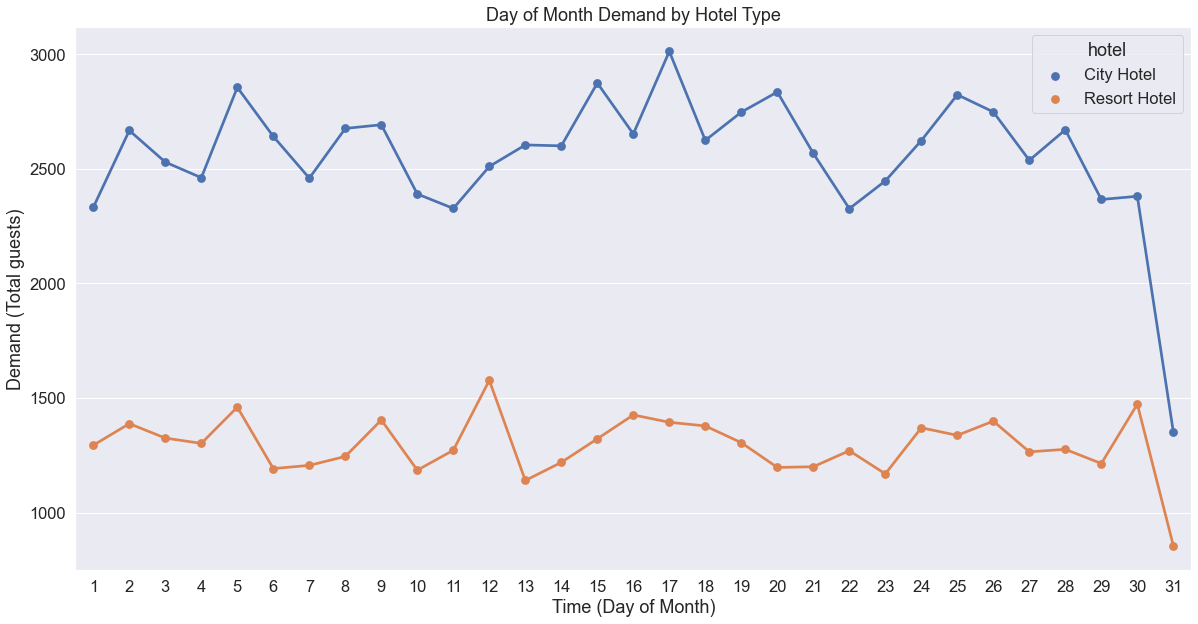

In [140]:
sns.set(font_scale=1.5,rc={'figure.figsize':(20,10)})
g = sns.pointplot(
    data=dd, 
    x="arrival_date_day_of_month", 
    y="demand",
    hue="hotel",
)
g.set(title="Day of Month Demand by Hotel Type")
g.set_xlabel("Time (Day of Month)", fontsize = 18)
g.set_ylabel("Demand (Total guests)", fontsize = 18)

In [115]:
monthly = df.groupby(pd.Grouper(key='arrival_date', axis=0, freq='M')).sum()
monthly = monthly.reset_index()
monthly

,arrival_date,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,demand
0,2015-07-31,1259,349687,5593640,81009,46354,2994,7744,5423,266.0,...,1339,28,406,249694.0,3201.0,0,271588.06,216,1226,5715.0
1,2015-08-31,1598,386537,7836335,130229,60489,4080,10322,7545,428.0,...,820,31,716,252627.0,10989.0,0,411934.11,248,2188,8031.0
2,2015-09-30,2094,629729,10304710,193858,80845,4883,12887,9512,183.0,...,2923,70,799,282301.0,33464.0,4585,484902.64,215,1869,9726.0
3,2015-10-31,1732,507567,9988355,208385,72663,4231,10920,8860,192.0,...,1612,136,692,277918.0,46518.0,15609,391084.63,250,1953,9084.0
4,2015-11-30,486,112535,4715100,109235,37129,1780,5874,3714,72.0,...,185,210,789,198631.0,84307.0,11793,141757.79,192,950,3807.0
5,2015-12-31,973,152968,5883800,148743,46900,2482,6391,5208,216.0,...,521,227,506,221401.0,19445.0,18159,216311.39,231,1392,5470.0
6,2016-01-31,557,73112,4531968,7703,36851,1598,4563,3696,116.0,...,445,548,557,162575.0,19299.0,14578,145597.69,209,988,3835.0
7,2016-02-29,1337,151131,7844256,30429,62915,3183,8011,6866,322.0,...,560,690,677,257694.0,38349.0,5169,272767.93,267,1622,7215.0
8,2016-03-31,1477,276541,9725184,58450,82026,3965,11628,8784,443.0,...,226,893,1074,342676.0,60876.0,11311,381430.43,357,2079,9261.0
9,2016-04-30,2061,465979,10942848,89379,89906,4689,12669,9994,453.0,...,433,870,1092,393463.0,36044.0,30678,482651.90,319,2223,10471.0


In [122]:
monthly['arrival_date']=monthly['arrival_date'].dt.to_period('M')

[Text(0, 0, '2015-07'),
 Text(1, 0, '2015-08'),
 Text(2, 0, '2015-09'),
 Text(3, 0, '2015-10'),
 Text(4, 0, '2015-11'),
 Text(5, 0, '2015-12'),
 Text(6, 0, '2016-01'),
 Text(7, 0, '2016-02'),
 Text(8, 0, '2016-03'),
 Text(9, 0, '2016-04'),
 Text(10, 0, '2016-05'),
 Text(11, 0, '2016-06'),
 Text(12, 0, '2016-07'),
 Text(13, 0, '2016-08'),
 Text(14, 0, '2016-09'),
 Text(15, 0, '2016-10'),
 Text(16, 0, '2016-11'),
 Text(17, 0, '2016-12'),
 Text(18, 0, '2017-01'),
 Text(19, 0, '2017-02'),
 Text(20, 0, '2017-03'),
 Text(21, 0, '2017-04'),
 Text(22, 0, '2017-05'),
 Text(23, 0, '2017-06'),
 Text(24, 0, '2017-07'),
 Text(25, 0, '2017-08')]

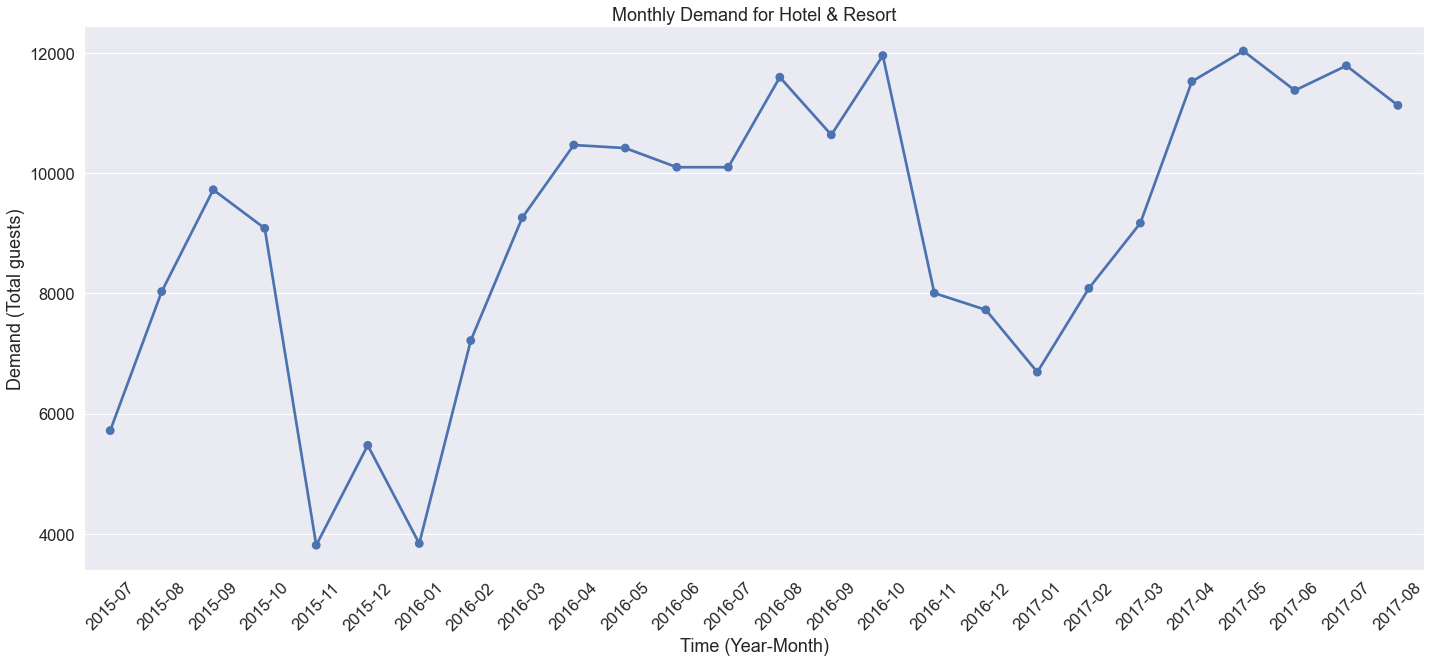

In [145]:
sns.set(font_scale=1.5,rc={'figure.figsize':(24,10)})
#fig, ax = plt.subplots()

g = sns.pointplot(
    data=monthly, 
    x="arrival_date", 
    y="demand"
)
#ax.grid(None)
g.set(title="Monthly Demand for Hotel & Resort")
g.set_xlabel("Time (Year-Month)", fontsize = 18)
g.set_ylabel("Demand (Total guests)", fontsize = 18)
g.set_xticklabels(g.get_xticklabels(),rotation = 45)